# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
units = "metric"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Base URL for OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city, using an f-string to format correctly
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | kolonia
Processing Record 3 of Set 1 | bubaque
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | qarqaraly
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | pakokku
Processing Record 10 of Set 1 | pritzwalk
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | itoman
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | perugorria
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | launceston
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | tarawa
Processing Record 22 of Set 1 | albany
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,18.44,58,24,5.75,AU,1731292843
1,kolonia,50.9333,6.9500,10.07,92,100,1.54,DE,1731292844
2,bubaque,11.2833,-15.8333,29.34,59,0,2.09,GW,1731292845
3,hawaiian paradise park,19.5933,-154.9731,25.96,84,75,3.60,US,1731292846
4,qarqaraly,49.4058,75.4742,-1.67,95,100,8.69,KZ,1731292848


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv",index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,18.44,58,24,5.75,AU,1731292843
1,kolonia,50.9333,6.9500,10.07,92,100,1.54,DE,1731292844
2,bubaque,11.2833,-15.8333,29.34,59,0,2.09,GW,1731292845
3,hawaiian paradise park,19.5933,-154.9731,25.96,84,75,3.60,US,1731292846
4,qarqaraly,49.4058,75.4742,-1.67,95,100,8.69,KZ,1731292848


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

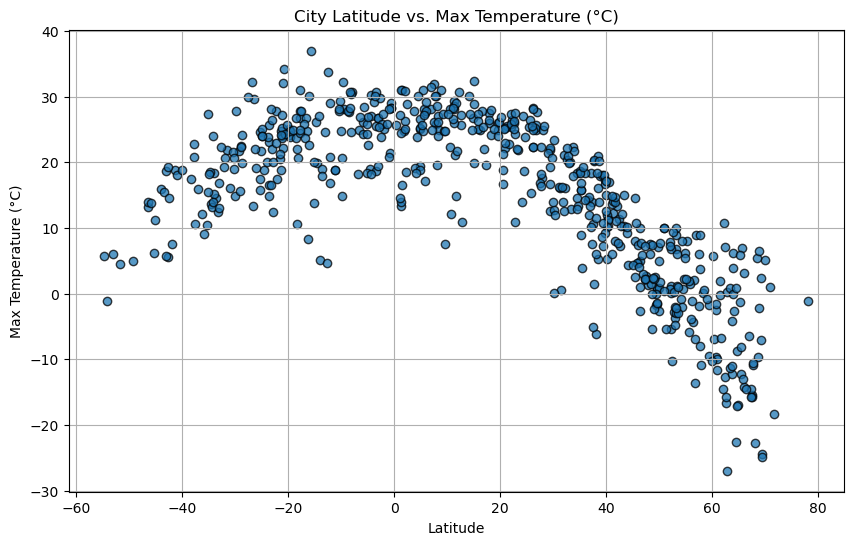

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

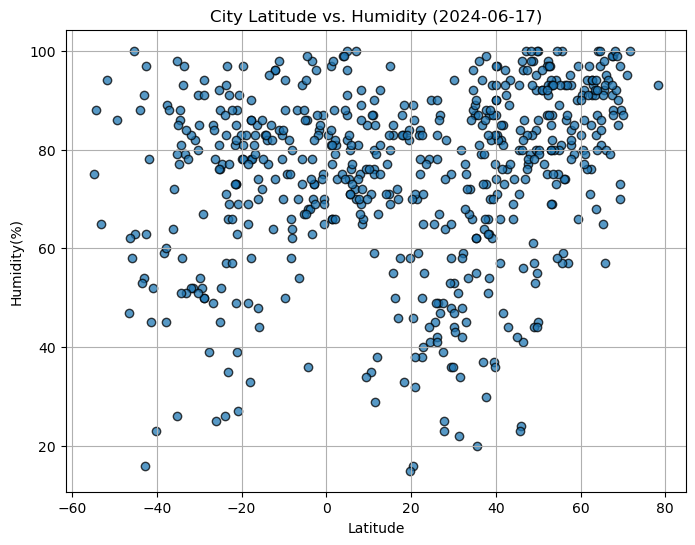

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

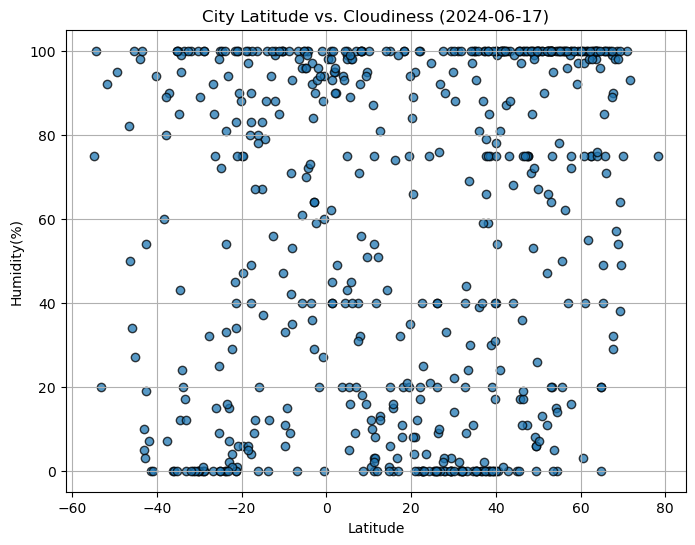

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

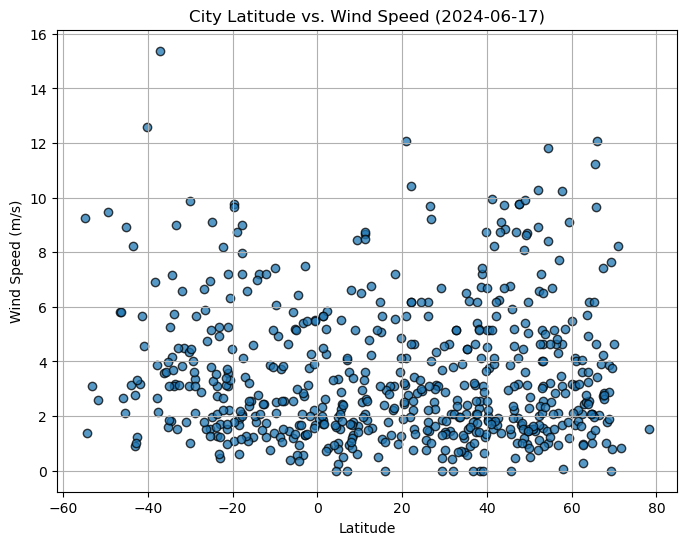

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coords):
    """
    Plots linear regression on a scatter plot of the given x and y values.
    
    Parameters:
    x_values (pd.Series): x-axis values (Latitude)
    y_values (pd.Series): y-axis values (weather metric)
    title (str): Title of the plot
    xlabel (str): Label for the x-axis
    ylabel (str): Label for the y-axis
    text_coords (tuple): Coordinates for placing the regression equation text
    
    Returns:
    None
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot scatter and regression line
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coords, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kolonia,50.9333,6.9500,10.07,92,100,1.54,DE,1731292844
2,bubaque,11.2833,-15.8333,29.34,59,0,2.09,GW,1731292845
3,hawaiian paradise park,19.5933,-154.9731,25.96,84,75,3.60,US,1731292846
4,qarqaraly,49.4058,75.4742,-1.67,95,100,8.69,KZ,1731292848
6,sitka,57.0531,-135.3300,8.94,57,40,7.72,US,1731292850


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,18.44,58,24,5.75,AU,1731292843
5,luderitz,-26.6481,15.1594,13.42,85,0,6.65,NaN,1731292849
13,adamstown,-25.0660,-130.1015,21.77,76,100,3.80,PN,1731292858
14,perugorria,-29.3413,-58.6106,21.70,52,0,4.00,AR,1731292859
15,waitangi,-43.9535,-176.5597,16.01,88,98,3.13,NZ,1731292860


###  Temperature vs. Latitude Linear Regression Plot

The r² value is: 0.75


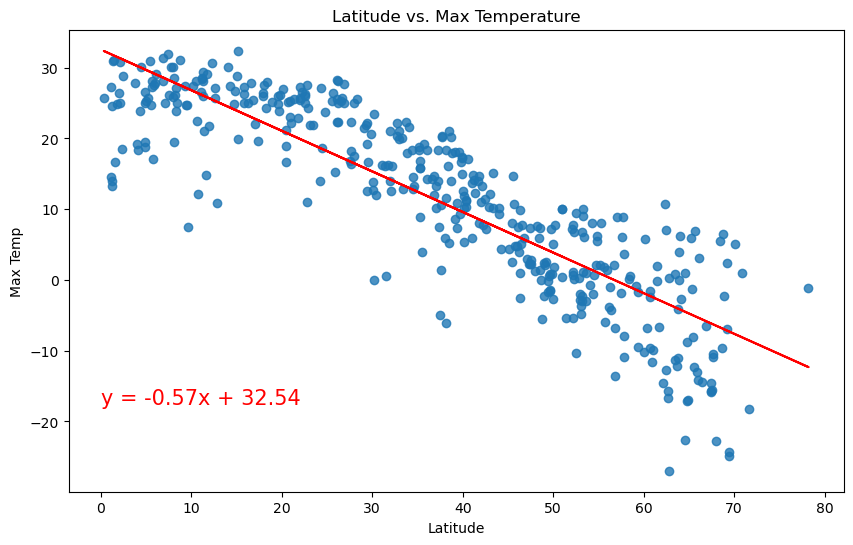

In [15]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (0, max(y_values) - 50), fontsize=15, color="red")

plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

The r² value is: 0.48


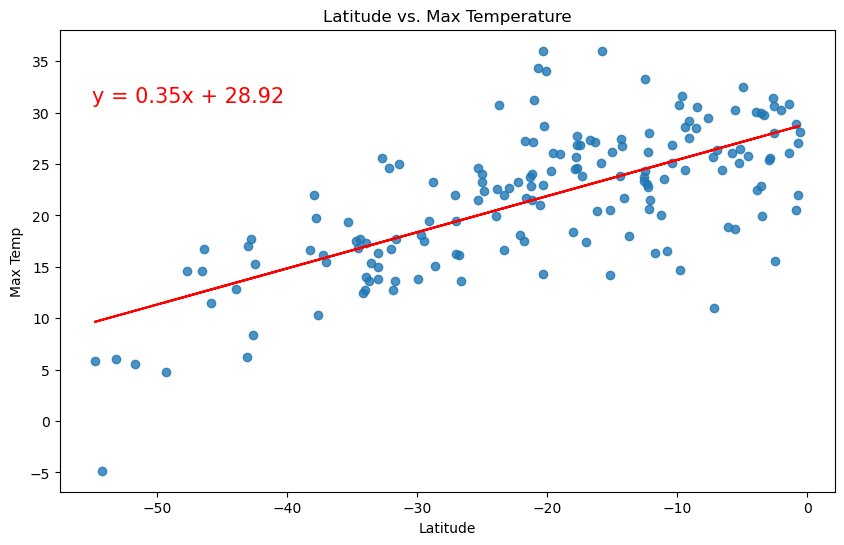

In [141]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (-55, max(y_values) - 5), fontsize=15, color="red")

plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()


Discussion about the linear relationship: 

Northern Hemisphere: The negative slope of the regression line (-0.57) indicates a strong negative correlation as latitude increases (moving north), the maximum temperature tends to decrease. While the data points are scattered around the regression line, the overall trend is clear. The r² value of 0.75 indicates that 75% of the variation in maximum temperature can be explained by latitude. This suggests that latitude is a strong predictor of temperature variations in the Northern Hemisphere.

Southern Hemisphere: The positive slope of the regression line (0.35) indicates a weak positive correlation as latitude increases (moving south), the maximum temperature tends to increase slightly. The data points are scattered around the regression line, suggesting that other factors besides latitude play a significant role in determining maximum temperatures. The r² value of 0.48 indicates that only 48% of the variation in maximum temperature can be explained by latitude. This suggests that other factors significantly influence temperature variations.

### Humidity vs. Latitude Linear Regression Plot

The r² value is: 0.07


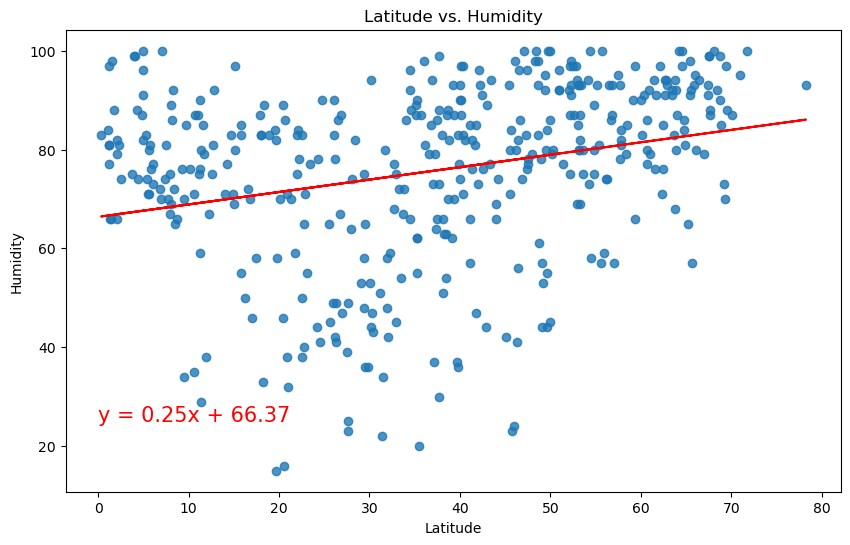

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (0, max(y_values) - 75), fontsize=15, color="red")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

The r² value is: 0.00


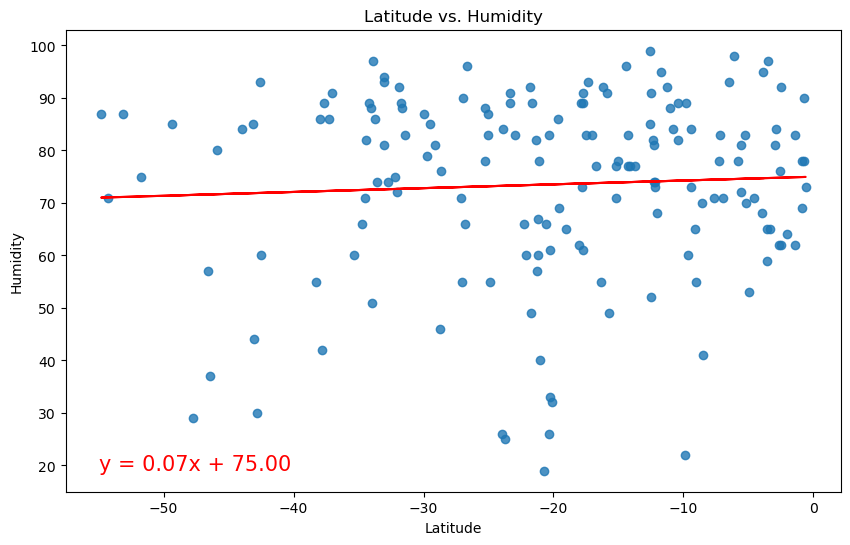

In [120]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (-55, max(y_values) - 80), fontsize=15, color="red")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

Discussion about the linear relationship: 

Northern Hemisphere: The positive slope of the regression line (0.25) indicates a weak positive correlation  as latitude increases (moving north), humidity tends to increase slightly. The data points are scattered around the regression line, suggesting that other factors besides latitude play a significant role in determining humidity levels. The R-squared value of 0.07 indicates that only 7% of the variation in humidity can be explained by latitude. This suggests that other factors significantly influence humidity variations.

Southern Hemisphere: The positive slope of the regression line (0.07) indicates a very weak positive correlation as latitude increases (moving south), humidity tends to increase slightly. The data points are widely scattered around the regression line, suggesting that other factors besides latitude play a significant role in determining humidity levels. The R-squared value of 0.00 indicates that almost none of the variation in humidity can be explained by latitude. This further confirms the extremely weak relationship between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r² value is: 0.07


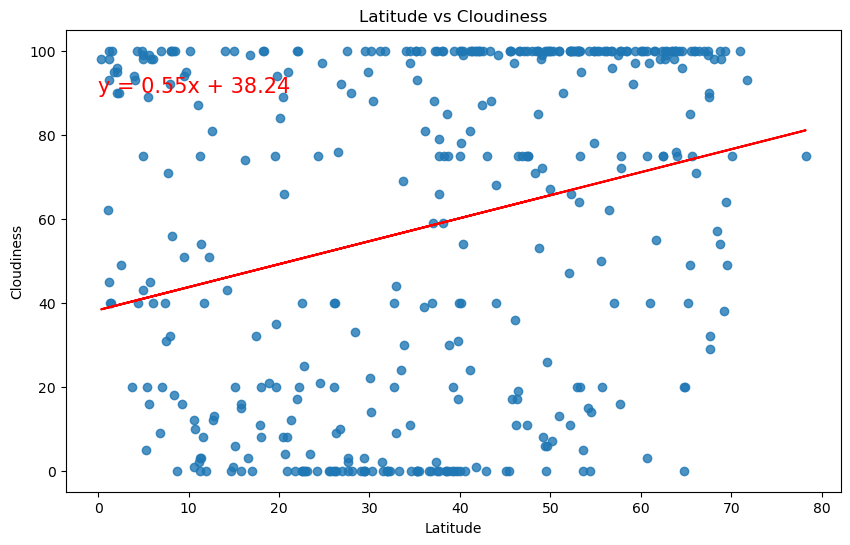

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (0, max(y_values) - 10), fontsize=15, color="red")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

The r² value is: 0.03


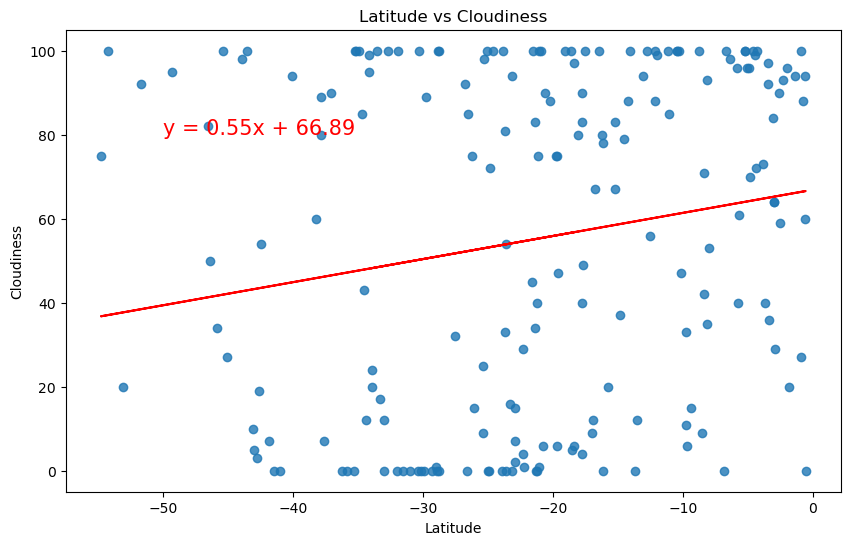

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (-50, max(y_values) - 20), fontsize=15, color="red")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

Discussion about the linear relationship:

Northern Hemisphere:  The positive slope of the regression line (0.55) indicates a moderate positive correlation as latitude increases (moving north), cloudiness tends to increase. The data points are scattered around the regression line, suggesting that other factors besides latitude play a significant role in determining cloudiness levels. The R-squared value of 0.07 indicates that only 7% of the variation in cloudiness can be explained by latitude. This suggests that other factors significantly influence cloudiness variations.

Southern Hemisphere: The positive slope of the regression line (0.55) indicates a moderate positive correlation as latitude increases (moving south), cloudiness tends to increase. The data points are widely scattered around the regression line, suggesting that other factors besides latitude play a significant role in determining cloudiness levels. The R-squared value of 0.03 indicates that almost none of the variation in cloudiness can be explained by latitude. This further confirms the extremely weak relationship between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r² value is: 0.01


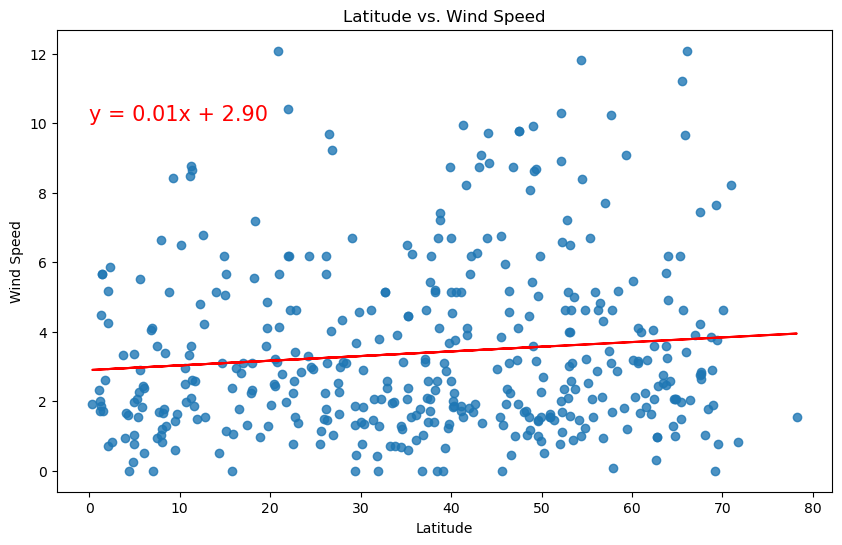

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)


slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (0, max(y_values) - 2), fontsize=15, color="red")

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()


The r² value is: 0.05


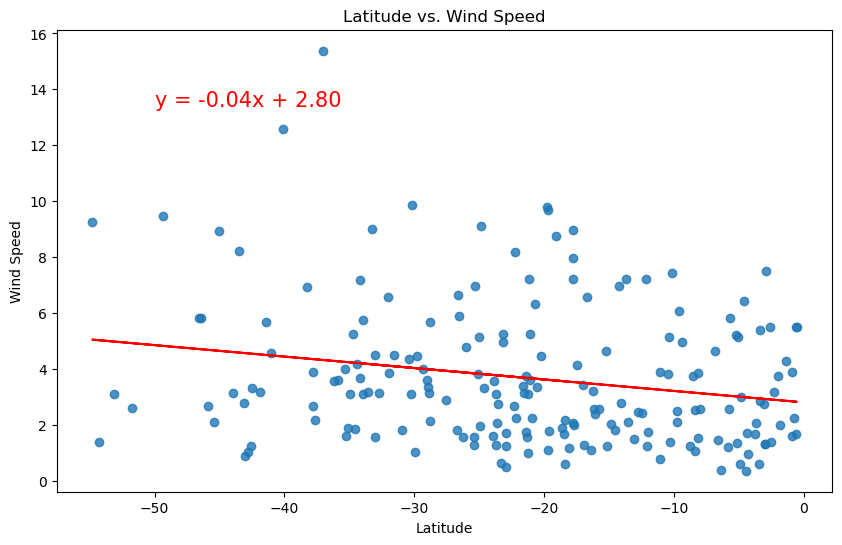

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.8)


slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-")
print(f"The r² value is: {r_value**2:.2f}")

plt.annotate(line_eq, (-50, max(y_values) - 2), fontsize=15, color="red")

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()


# Discussion about the linear relationship:

Northern Hemisphere: The positive slope of the regression line (0.01) indicates a very weak positive correlation as latitude increases (moving north), wind speed tends to increase slightly. The data points are widely scattered around the regression line, suggesting that other factors besides latitude play a significant role in determining wind speed levels. The R-squared value of 0.01 indicates that only 1% of the variation in wind speed can be explained by latitude. This suggests that other factors significantly influence wind speed variations.

Southern Hemisphere: The negative slope of the regression line (-0.04) indicates a very weak negative correlation as latitude increases (moving south), wind speed tends to decrease slightly. The data points are widely scattered around the regression line, suggesting that other factors besides latitude play a significant role in determining wind speed levels. The R-squared value of 0.05 indicates that only 5% of the variation in wind speed can be explained by latitude. This suggests that other factors significantly influence wind speed variations.